<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E3%80%90%E7%A0%82%E5%B7%9D%E5%BF%AB%E6%96%97%E3%80%91%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E3%81%AE%E6%BC%94%E7%BF%92_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習の演習

## 0. 事前準備

### 0.1 環境構築

まずは次のセルを実行してください。

In [81]:
# こちらのセルを実行してください。
!pip install openpyxl==3.0.0

実行が完了したら、左上のメニューバーから「ランタイム」 $\rightarrow$ 「ランタイムを再起動」を押してください。

ランタイムの再起動が終わったら、次のセルを実行してください。

In [82]:
# こちらのセルを実行してください。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

今回使用するデータをダウンロードします。

次のセルを実行してください。

In [83]:
!wget "https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx" -O 'cycle_training.xlsx'

--2022-04-01 14:57:29--  https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx
Resolving us.v-cdn.net (us.v-cdn.net)... 104.18.193.13, 104.18.194.13, 2606:4700::6812:c20d, ...
Connecting to us.v-cdn.net (us.v-cdn.net)|104.18.193.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62467 (61K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘cycle_training.xlsx’

cycle_training.xlsx 100%[===================>]  61.00K  --.-KB/s    in 0.007s  

2022-04-01 14:57:29 (8.42 MB/s) - ‘cycle_training.xlsx’ saved [62467/62467]



これで、ダウンロードできました。次のセルを実行して、データフレームとして読み込みましょう。

In [84]:
df_cycle = pd.read_excel('cycle_training.xlsx')
df_cycle

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972


これでデータのダウンロードができました。

### 0.2 データ・演習についての説明

今回は天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデルを作っていただきます。

各列の意味は次のようになっています。
- Instant: 日時固有のID
- Season: 季節	
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



これらを用いて2011年のデータを学習させ、2012年のcountを予測するモデルを作成してください。

*タイタニックデータと同様に、まずはデータの確認及び可視化を行って、データの外観を理解した上で必要な前処理を実施してください。
その上で適切なモデルを作成し、精度評価を実行するという流れで行ってください。

(こちらはは自由記述課題になります。)

#データの確認

In [85]:
#レコード数確認
len(df_cycle)

530

In [86]:
#カラム数確認
len(df_cycle.columns)

14

In [87]:
df_cycle.head()

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [88]:
#データ型確認
df_cycle.dtypes

Instant               object
Season                object
year                   int64
dteday        datetime64[ns]
mnth                   int64
holiday               object
weekday                int64
WorkingDay            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
count                  int64
dtype: object

In [89]:
#各カラムの統計量算出
df_cycle.describe().round(3)

,year,mnth,weekday,temp,atemp,hum,windspeed,count
count,530.000,530.000,530.000,530.000,530.000,530.000,530.000,530.000
mean,2011.311,5.504,2.994,0.473,0.455,0.626,0.196,3900.515
std,0.463,3.362,2.003,0.179,0.160,0.151,0.078,1662.359
min,2011.000,1.000,0.000,0.059,0.079,0.000,0.022,431.000
25%,2011.000,3.000,1.000,0.324,0.322,0.507,0.139,2603.750
50%,2011.000,5.000,3.000,0.464,0.457,0.626,0.189,4062.000
75%,2012.000,8.000,5.000,0.628,0.585,0.738,0.238,4888.500
max,2012.000,12.000,6.000,0.849,0.841,0.972,0.507,8362.000


#データ加工

- year: 年
- mnth: 月
- weekday: 曜日
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数

　はそのままで


* Season: 季節
* holiday: 祝日か否か
* WorkingDay: 営業日か否か
* weathersit: 天候

についてはダミー変数加工

In [90]:
#ダミー変数化
df_cycle_except_object = pd.get_dummies(df_cycle[['year', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'count', 'Season', 'holiday', 'WorkingDay', 'weathersit']])
df_cycle_except_object

,year,mnth,weekday,temp,atemp,hum,windspeed,count,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
0,2011,1,6,0.344167,0.363625,0.805833,0.160446,985,0,1,0,0,1,0,1,0,0,1,0
1,2011,1,0,0.363478,0.353739,0.696087,0.248539,801,0,1,0,0,1,0,1,0,0,1,0
2,2011,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,1,0,0,1,0,0,1,1,0,0
3,2011,1,2,0.200000,0.212122,0.590435,0.160296,1562,0,1,0,0,1,0,0,1,1,0,0
4,2011,1,3,0.226957,0.229270,0.436957,0.186900,1600,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2012,6,6,0.710833,0.648367,0.437083,0.144287,7498,0,0,1,0,1,0,1,0,1,0,0
526,2012,6,0,0.726667,0.663517,0.538333,0.133721,6598,0,0,1,0,1,0,1,0,1,0,0
527,2012,6,1,0.720833,0.659721,0.587917,0.207713,6664,0,0,1,0,1,0,0,1,0,1,0
528,2012,6,2,0.653333,0.597875,0.833333,0.214546,4972,0,0,1,0,1,0,0,1,0,1,0


2011年のデータのみに加工

In [91]:
df_cycle_except_object = df_cycle_except_object[df_cycle_except_object['year'] == 2011]

#データの可視化により関連性調査

量的データの可視化

In [92]:
#yearごとのレンタル数
df_cycle_except_object.groupby('year').mean()['count'].round(3)

year
2011    3405.762
Name: count, dtype: float64

In [93]:
#mnthごとのレンタル数
df_cycle_except_object.groupby('mnth').mean()['count'].round(3)

mnth
1     1231.903
2     1721.964
3     2065.968
4     3162.333
5     4381.323
6     4783.733
7     4559.387
8     4409.387
9     4247.267
10    3984.226
11    3405.567
12    2816.871
Name: count, dtype: float64

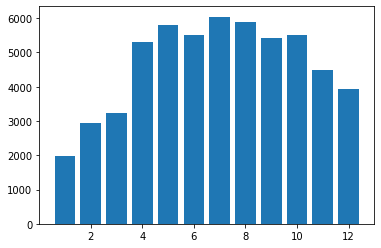

In [94]:
#棒グラフで描画
plt.figure()
plt.bar(df_cycle_except_object['mnth'], df_cycle_except_object['count'])
plt.show()

In [95]:
#weekdayごとのレンタル数
df_cycle_except_object.groupby('weekday').mean()['count'].round(3)

weekday
0    3405.269
1    3465.788
2    3468.038
3    3253.250
4    3356.769
5    3500.115
6    3391.377
Name: count, dtype: float64

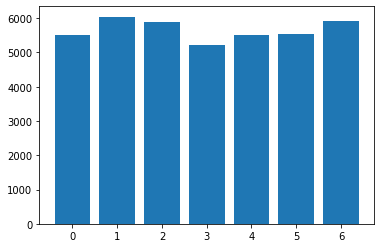

In [120]:
#棒グラフで描画
plt.figure()
plt.bar(df_cycle_except_object['weekday'], df_cycle_except_object['count'])
plt.show()

質的データの可視化

In [98]:
#各変数間の相関係数確認
df_cycle_except_object.corr()

,year,mnth,weekday,temp,atemp,hum,windspeed,count,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,NaN,1.000000,0.012860,0.288663,0.301920,0.242533,-0.242443,0.444607,0.199081,-0.568456,-0.315500,0.686895,-0.032808,0.032808,0.004288,-0.004288,0.032921,-0.079237,0.108516
weekday,NaN,0.012860,1.000000,-0.039292,-0.042810,-0.065932,0.061525,-0.004396,-0.002416,0.016690,-0.008681,-0.005514,0.076087,-0.076087,-0.020445,0.020445,-0.044659,0.034594,0.026706
temp,NaN,0.288663,-0.039292,1.000000,0.996458,0.145776,-0.114200,0.771214,0.667255,-0.643992,0.145907,-0.180615,0.019272,-0.019272,-0.046799,0.046799,0.086702,-0.067856,-0.050192
atemp,NaN,0.301920,-0.042810,0.996458,1.000000,0.155812,-0.136544,0.775294,0.653619,-0.649430,0.148616,-0.164009,0.026448,-0.026448,-0.046158,0.046158,0.091173,-0.070129,-0.055706
hum,NaN,0.242533,-0.065932,0.145776,0.155812,1.000000,-0.215718,0.001898,0.004013,-0.253585,0.056884,0.192937,0.030896,-0.030896,-0.034250,0.034250,-0.563619,0.454639,0.294002
windspeed,NaN,-0.242443,0.061525,-0.114200,-0.136544,-0.215718,1.000000,-0.278000,-0.108109,0.171647,0.108679,-0.172096,-0.000734,0.000734,-0.011955,0.011955,-0.083567,0.039563,0.110027
count,NaN,0.444607,-0.004396,0.771214,0.775294,0.001898,-0.278000,1.000000,0.452814,-0.722582,0.155752,0.106695,0.049193,-0.049193,-0.020661,0.020661,0.267850,-0.165493,-0.260361
Season_Fall,NaN,0.199081,-0.002416,0.667255,0.653619,0.004013,-0.108109,0.452814,1.000000,-0.336926,-0.341894,-0.334441,0.022083,-0.022083,-0.021801,0.021801,0.100606,-0.091733,-0.027238
Season_Spring,NaN,-0.568456,0.016690,-0.643992,-0.649430,-0.253585,0.171647,-0.722582,-0.336926,1.000000,-0.332099,-0.324859,-0.020803,0.020803,0.022493,-0.022493,0.003586,0.019120,-0.054391


In [99]:
df_cycle_except_object.columns

Index(['year', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'count',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'holiday_No', 'holiday_Yes', 'WorkingDay_No', 'WorkingDay_Yes',
       'weathersit_Clear', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

#学習データ、検証データ分割

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [101]:
X = df_cycle_except_object.drop('count', axis=1)
y = df_cycle_except_object['count']
print(X.shape)
print(y.shape)

(365, 18)
(365,)


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

   year  mnth  weekday      temp     atemp       hum  windspeed  Season_Fall  \
0  2011     1        6  0.344167  0.363625  0.805833   0.160446            0   
1  2011     1        0  0.363478  0.353739  0.696087   0.248539            0   
2  2011     1        1  0.196364  0.189405  0.437273   0.248309            0   
3  2011     1        2  0.200000  0.212122  0.590435   0.160296            0   
4  2011     1        3  0.226957  0.229270  0.436957   0.186900            0   

   Season_Spring  Season_Summer  Season_Winter  holiday_No  holiday_Yes  \
0              1              0              0           1            0   
1              1              0              0           1            0   
2              1              0              0           1            0   
3              1              0              0           1            0   
4              1              0              0           1            0   

   WorkingDay_No  WorkingDay_Yes  weathersit_Clear  weathersit_Cloud

#モデリング

説明変数が量的変数のためRandomForestRegressorをモデルとして使用

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
random_forest = RandomForestRegressor(random_state=0)

In [105]:
random_forest = random_forest.fit(X_train,y_train)

In [106]:
y_pred = random_forest.predict(X_test)
y_pred

array([4820.65, 4725.88, 3724.18, 3795.8 , 3758.8 , 3933.3 , 3800.36,
       3348.07, 3201.03, 3115.43, 3110.57, 3499.24, 3741.98, 3835.89,
       3615.41, 3703.79, 4485.58, 4082.47, 2387.03, 2226.44, 2474.92,
       3964.51, 4035.45, 4063.44, 4153.47, 4357.16, 4056.23, 4203.18,
       3674.59, 2732.05, 3272.96, 3816.88, 4329.4 , 4129.11, 4043.43,
       3903.27, 2823.71, 3646.07, 2669.3 , 2789.09, 2769.21, 3701.1 ,
       4020.44, 3694.98, 3505.98, 2049.27, 1435.66, 2174.56, 2378.35,
       2595.76, 2603.24, 2683.95, 2401.28, 2255.7 , 2527.27, 2592.67,
       2711.62, 2656.52, 2387.58, 2232.81, 2406.77, 3013.38, 4014.7 ,
       3784.39, 2585.16, 2031.3 , 2152.14, 2240.92, 3679.07, 2650.79,
       1424.67, 2728.71, 2583.92, 2552.93, 2627.11, 3860.32, 3909.87,
       3431.35, 2140.27, 2092.47, 2191.09, 2217.15, 2382.96, 2399.75,
       2649.55, 1280.37, 2028.69, 2065.69, 2219.45, 1929.02, 1862.68,
       2026.05, 2200.87, 2525.16, 2343.72, 1996.41, 1897.64, 1964.97,
       2480.66, 2458

In [107]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_pred,y_test)

0.34217881877052103

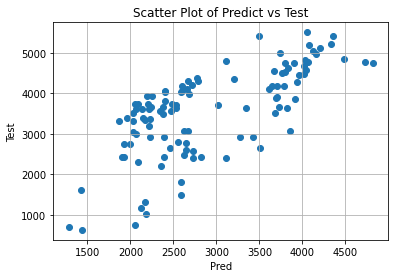

In [108]:
plt.scatter(y_pred,y_test)
plt.title('Scatter Plot of Predict vs Test')    
plt.xlabel('Pred') 
plt.ylabel('Test')    
plt.grid()                                 
plt.show()  

#モデルの評価

In [109]:
from sklearn.metrics import r2_score

In [110]:
len(y)

365

In [111]:
len(y_pred)

110

In [112]:
r2_score(y_pred,y_test)

-0.5103399460455518